## Observations and Insights 


1) Capomulin and Ramicane having the most timepoints may mean that they were the more successful treatments available. The plot from the chosen mouse with the Capomulin treatment shows how the tumor volume went down over time, whereas the mouse with the Naftisol treatment had its tumor volume increase despite recieving treatment. The fact that Naftisol has the least amount of time points may signify that some mice did not survive the treatment throughout the testing process. 


2) The fact that there was only one noticeable outlier signifies that most mice responded to the treatment in similiar ways, with little abnormalities being visible in the 4 selected drug treatments. This may present signs of a properly designed study and can be validated by standard deviations that are not significantly large when compared to its proportion to the mean. This means the data was fairly consistent throughout.


 3) Finally from the boxplot between Capomulin, Ramicane, Infubinol, and Ceftamin we can see conclude that Capomulin and Ramicane succeeded much better in lowering tumor volume when compared to Infubinol and Ceftamin. The one noticeable outlier was likely a mouse that got a decrease in tumor volume whereas the rest of its counterparts experienced unfortunate increases. One could speculate that based on the generated scatter plots, the Infubinol and Ceftamin regimens may have used heavier mice in their experiments, thus leading to more polarized results. 


In [193]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata,study_results, on = 'Mouse ID', how = 'outer')
data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [194]:
# Checking the number of mice.
mouse_counts = data['Mouse ID'].value_counts()
total_mice = len(data['Mouse ID'].unique())
print(total_mice)
# check mouse ID with count = 13, evident repeats?
data[data['Mouse ID'] == 'g989']



249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [195]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
drop_dups = data.drop_duplicates(subset = ['Mouse ID','Timepoint'])

#check with the same mouse, it is now down to 10 and all timepoints are unique
drop_dups[drop_dups['Mouse ID'] == 'g989']['Timepoint'].value_counts()

# mouse_counts = data['Mouse ID'].value_counts()
# mouse_counts


15    1
30    1
10    1
25    1
5     1
20    1
35    1
0     1
Name: Timepoint, dtype: int64

In [196]:
# Check which mice contain duplicated timepoints more precisely, 
# rather than trial and error approach as in previous two cells

mice = data['Mouse ID'].unique()
dup_mice = []

for mouse in mice:
    time_counts = data[data['Mouse ID'] == mouse]['Timepoint'].value_counts()
    c = [x for x in time_counts]

    #if not all elements in c are  = 1, then append mouse to dup_mice
    if all(count == 1 for count in c) == False:
        dup_mice.append(mouse)
dup_mice
print(f'The faulty mouse has ID {dup_mice[0]}.')
faulty_mouse_data = data[data['Mouse ID'] == dup_mice[0]]
faulty_mouse_data

The faulty mouse has ID g989.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [197]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#get indices of the rows containing the duplicate mouse
inds_dup_mouse = data.index[data['Mouse ID'] == dup_mice[0]]

df = data.drop(inds_dup_mouse)
df.shape

# Removed a total of 13 rows by cleaning the data, 
# which happens to be the count of the mouse tested for repeats 
# in trial and error approach

(1880, 8)

In [198]:
# Checking the number of mice in the clean DataFrame.
len(df['Mouse ID'].unique())
#new number of mice is 248, so the data for one faulty mouse was removed

248

## Summary Statistics

In [199]:
# Generated a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# Used the aggregation method, producing the summary statistics in a single line
gp_drug = df.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
gp_drug = gp_drug.rename(columns = {'mean':'Mean', 'median':'Median','var':'Variance','std':'Standard Deviation','sem':'SEM'})
gp_drug


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints per Drug Regimen')

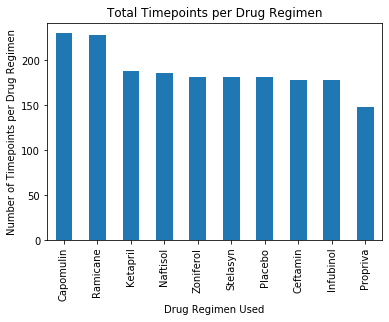

In [200]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_count = df['Drug Regimen'].value_counts()
timepoints_count.plot(kind = 'bar')
plt.title('Total Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen Used')
plt.ylabel('Number of Timepoints per Drug Regimen')

Text(0, 0.5, 'Number of Timepoints per Drug Regimen')

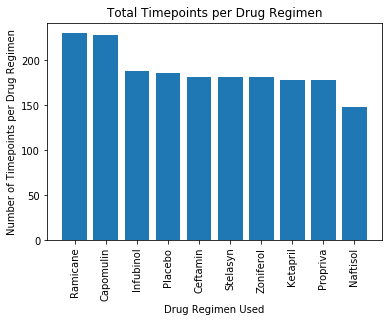

In [201]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_names = df['Drug Regimen'].unique()
plt.bar(drug_names,timepoints_count)
plt.xticks(rotation = 90)
plt.title('Total Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen Used')
plt.ylabel('Number of Timepoints per Drug Regimen')

Text(0.5, 1.0, 'Total Male Mice vs. Total Female Mice')

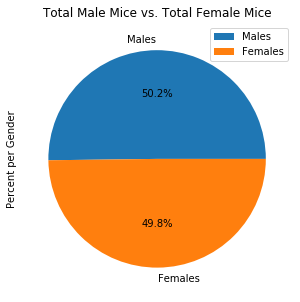

In [202]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
num_males = mouse_metadata['Sex'].value_counts()[0]
num_females = mouse_metadata['Sex'].value_counts()[1]
total_mice = num_males + num_females
sexes_df = pd.DataFrame({'Counts':[num_males/total_mice,num_females/total_mice]}, index = ['Males','Females'])

#sexes_df
sexes_df.plot(kind = 'pie', figsize = (5,5,) , subplots = True,autopct='%1.1f%%')
plt.ylabel('Percent per Gender')
plt.title('Total Male Mice vs. Total Female Mice')

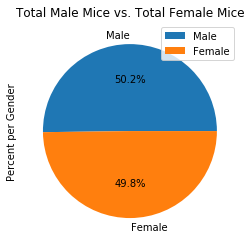

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie([num_males/total_mice,num_females/total_mice],labels = ['Male','Female'],autopct='%1.1f%%')
plt.title('Total Male Mice vs. Total Female Mice')
plt.ylabel('Percent per Gender')
plt.legend()


## Quartiles, Outliers and Boxplots

In [204]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tum_vol = []
drug_name = []

for mouse in mice:
    #get drug name and append to list
    last_tumor_vol = data[data['Mouse ID'] == mouse][['Drug Regimen','Tumor Volume (mm3)','Timepoint']]
    drug_last_tumor_vol = last_tumor_vol['Drug Regimen'].iloc[-1]
    
    drug_name.append(drug_last_tumor_vol)

    #get greatest recorded timepoint value and append the tumor volume associated with it 
    mouse_last_tumor_vol = last_tumor_vol.sort_values(by = ['Timepoint'])['Tumor Volume (mm3)'].iloc[-1]
    tum_vol.append(mouse_last_tumor_vol)

#create a data frame of last volumes and its associated drug regimen   
last_vol_df = pd.DataFrame({'Drug':drug_name,'Last Volume':tum_vol})
last_vol_df


,Drug,Last Volume
0,Ramicane,22.050126
1,Capomulin,23.343598
2,Capomulin,28.484033
3,Capomulin,28.430964
4,Ramicane,29.128472
...,...,...
244,Stelasyn,45.934712
245,Propriva,48.710661
246,Infubinol,62.754451
247,Naftisol,65.741070


In [205]:
#Use list of 4 selected drug regimens to loop through and calculate quartiles, IQR 
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
outliers_list = []

for drug in drug_regimens:
    #get list of last recorded volume for all entries of selected drug regimen
    vol_list = last_vol_df[last_vol_df['Drug'] == drug]['Last Volume']
    
    #compute quantiles and IQR
    quart_vol = vol_list.quantile([.25,.75])
    lowerq_vol = quart_vol[.25]
    upperq_vol = quart_vol[.75]
    IQR = upperq_vol-lowerq_vol

    #compute Lower and Upper Bounds
    upper_bound_vol = upperq_vol + (1.5*IQR)
    lower_bound_vol = lowerq_vol - (1.5*IQR)

    #check to see if any values in vol_list are greater than upper or less than lower
    outliers = [vol for vol in vol_list if vol>upper_bound_vol or vol<lower_bound_vol]
    outliers_list.append(outliers)
outliers_list

#found an outlier in Infubinol

[[], [], [36.321345799999996], []]

Text(0, 0.5, 'Tumor Volume (mm3)')

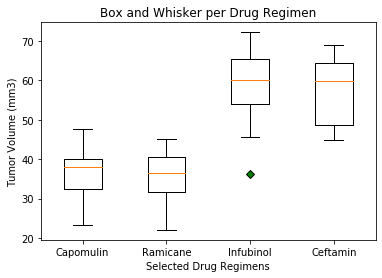

In [206]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# set format for outliers in proceeding plot
green_diamond = dict(markerfacecolor='g', marker='D')

#get list of lists for all last recorded tumor sizes per drug regimen
vol_list = [last_vol_df[last_vol_df['Drug'] == drug]['Last Volume'] for drug in drug_regimens]

#construct the plot
plt.boxplot(vol_list,flierprops=green_diamond, labels = drug_regimens)
plt.title('Box and Whisker per Drug Regimen')
plt.xlabel('Selected Drug Regimens')
plt.ylabel('Tumor Volume (mm3)')

## Line and Scatter Plots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(2, 60, 'Naftisol')

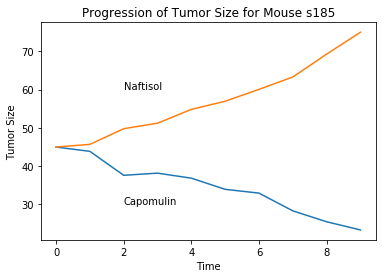

In [207]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Extract a single mouse from Capomulin treatments 
capo_mouse_id = df[df['Drug Regimen'] == 'Capomulin'].iloc[1,0]
capo_mouse_data = df[df['Mouse ID'] == capo_mouse_id]

naft_mouse_id = df[df['Drug Regimen'] == 'Naftisol'].iloc[1,0]
naft_mouse_data = df[df['Mouse ID'] == naft_mouse_id]

capo_tumor_data = capo_mouse_data['Tumor Volume (mm3)']
naft_tumor_data = naft_mouse_data['Tumor Volume (mm3)']

time = [x for x in range(len(capo_tumor_data))]
display(capo_mouse_data)

# construct plot
plt.plot(time, capo_tumor_data)
plt.plot(time, naft_tumor_data)
plt.title(f'Progression of Tumor Size for Mouse {capo_mouse_id}')
plt.xlabel('Time')
plt.ylabel('Tumor Size')
plt.annotate('Capomulin',xy = (2,30))
plt.annotate('Naftisol',xy = (2,60))

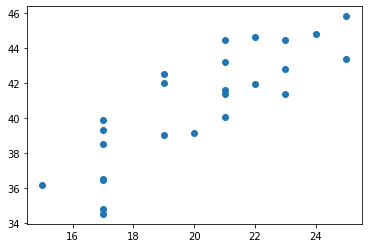

In [208]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
dg_mice = df.groupby(['Drug Regimen','Mouse ID']).mean()

capo_averages = dg_mice.loc['Capomulin']
weights = capo_averages['Weight (g)']
tumor_weights = capo_averages['Tumor Volume (mm3)']
plt.scatter(weights,tumor_weights)

## Correlation and Regression

Slope is 0.95
Y Intercept is 21.55
R Squared coefficient is 0.71
Calculated Trendline is y=0.95x + 21.55


Text(22, 40, 'y=0.95x + 21.55')

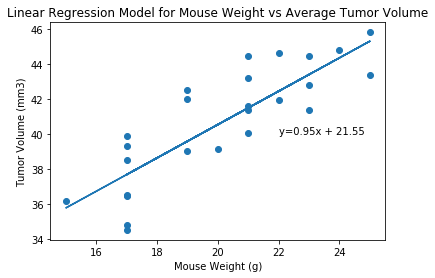

In [209]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#construct linear regression model and corresponding values
(slope,y_int,r,_,_) = st.linregress(weights,tumor_weights)

slope = round(slope,2)
y_int = round(y_int,2)
line = f'y={slope}x + {y_int}'

#print output recieved
print('Slope is ' + str(slope))
print('Y Intercept is ' + str(y_int))
print('R Squared coefficient is ' + str(round(r**2,2)))
print(f'Calculated Trendline is {line}')


# gather plotting data 
x_values = weights
y_values = [slope * x + y_int for x in weights]

#construct plot
plt.scatter(weights,tumor_weights)
plt.plot(x_values,y_values)
plt.title('Linear Regression Model for Mouse Weight vs Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.annotate(line,xy = (22,40))

# r^2 value is moderatly close to 1, and as seen by the plot there is an evident correlation between
# mouse weight and tumor volume
